## Kaggle competition: APTOS 2019 Blindness Detection 

https://www.kaggle.com/c/aptos2019-blindness-detection/overview

In [1]:
import os
import seaborn as sns
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

In [2]:
IMAGES_PATH = './raw/train_images'

In [3]:
# Get the dimensions of images
sizes = []

for r, _, f in os.walk(IMAGES_PATH):
    for file in f:
        if file.endswith(".png"):
            file_path = os.path.join(r, file)
            with Image.open(file_path) as img:
                w, h = img.size
                sizes.append([file_path, w, h])

print(len(sizes))

3662


In [4]:
data = np.array(sizes)
df = pd.DataFrame(data = data, columns = ['file_path', 'x', 'y'])
df['x'] = df['x'].astype('int32')
df['y'] = df['y'].astype('int32')
df.head()

,file_path,x,y
0,./raw/train_images/77a9538b8362.png,2416,1736
1,./raw/train_images/a6d45de20e4d.png,3216,2136
2,./raw/train_images/d06ccd0cf4b8.png,2588,1958
3,./raw/train_images/8ff863f8874f.png,2588,1958
4,./raw/train_images/9df31421cdd2.png,2588,1958


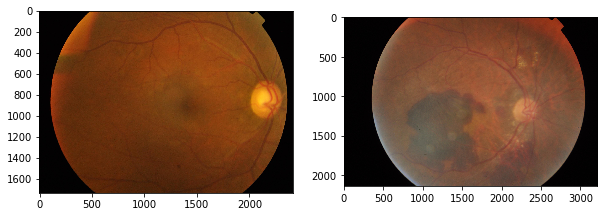

In [9]:
# Show the first two images

fig = plt.figure(figsize=(10,10))

f1 = fig.add_subplot(1,2,1)
img = mpimg.imread(df.iloc[0,0])
imgplot = plt.imshow(img)

f2 = fig.add_subplot(1,2,2)
img = mpimg.imread(df.iloc[1,0])
imgplot = plt.imshow(img)


In [6]:
# Size information
x_max = df['x'].max()
x_min = df['x'].min()
y_max = df['y'].max()
y_min = df['y'].min()

print(x_max, x_min)
print(y_max, y_min)

print("Images with Max X ({} px): {}".format(x_max, len(df[df['x'] == x_max])))
print("Images with Mix X ({} px): {}".format(x_min, len(df[df['x'] == x_min])))
print("Images with Max Y ({} px): {}".format(y_max, len(df[df['y'] == y_max])))
print("Images with Min Y ({} px): {}".format(y_min, len(df[df['y'] == y_min])))


4288 474
2848 358
Images with Max X (4288 px): 52
Images with Mix X (474 px): 2
Images with Max Y (2848 px): 52
Images with Min Y (358 px): 2


In [7]:
x_median = df['x'].median()
y_median = df['y'].median()
x_mean = df['x'].mean()
y_mean = df['y'].mean()

print("Median of X: {}".format(x_median))
print("Median of Y: {}".format(y_median))
print("Mean of X: {:.4f}".format(x_mean))
print("Mean of Y: {:.4f}".format(y_mean))

Median of X: 2144.0
Median of Y: 1536.0
Mean of X: 2015.1767
Mean of Y: 1526.8301


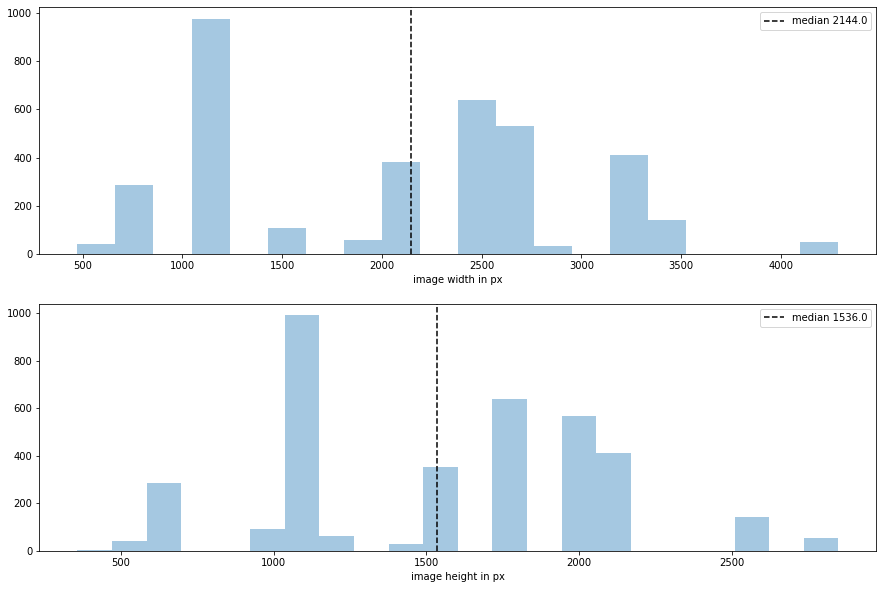

In [8]:
# Distribution by X value
fig = plt.figure(figsize=(15, 10))
s1 = fig.add_subplot(2,1,1)
sns.distplot(df['x'], kde=False, norm_hist=False, axlabel="image width in px")
plt.axvline(x_median, color='k', label="median " + str(x_median), linestyle='--')

# Distribution by Y value
s2 = fig.add_subplot(2,1,2)
sns.distplot(df['y'], kde=False, norm_hist=False, axlabel="image height in px")
plt.axvline(y_median, color='k', label="median " + str(y_median), linestyle='--')

s1.legend()
s2.legend()

fig.show()